# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# EDA

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


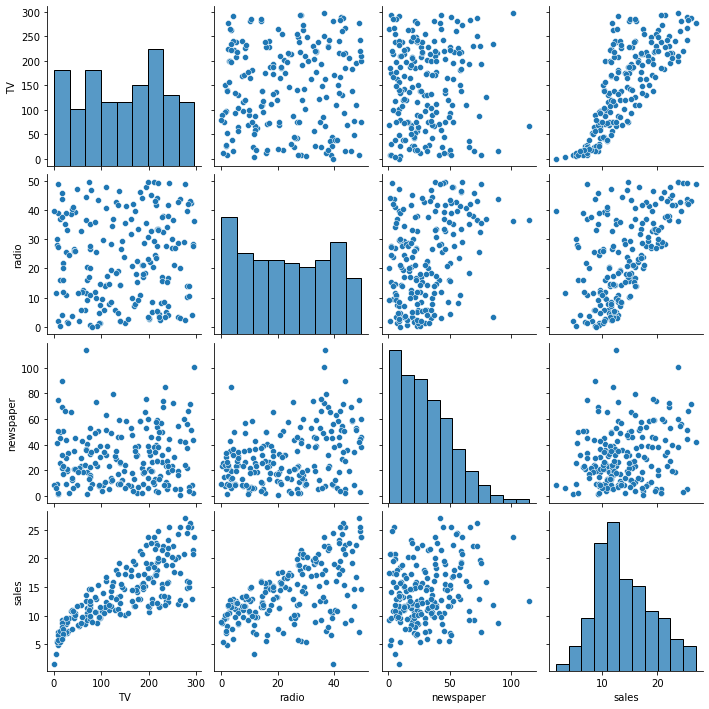

In [9]:
sns.pairplot(df)
plt.show()

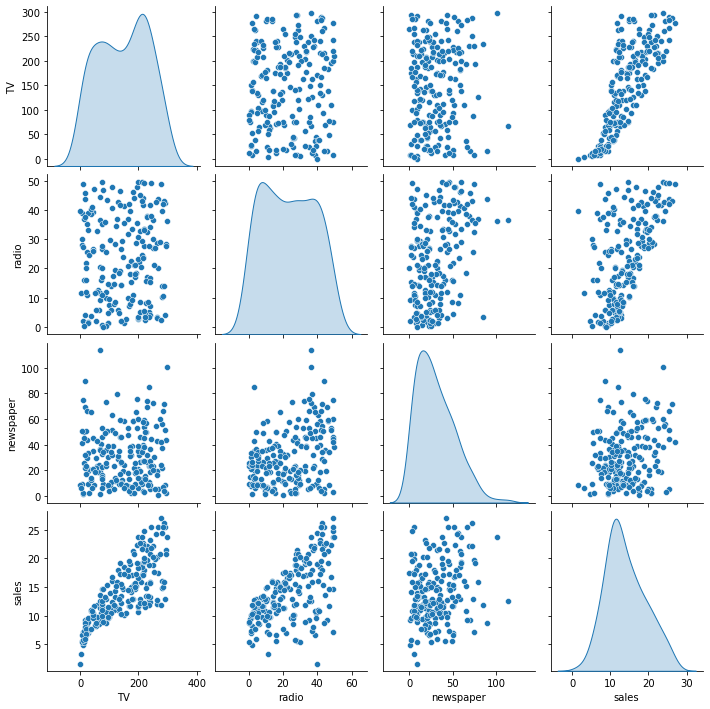

In [10]:
#Relationship between features
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

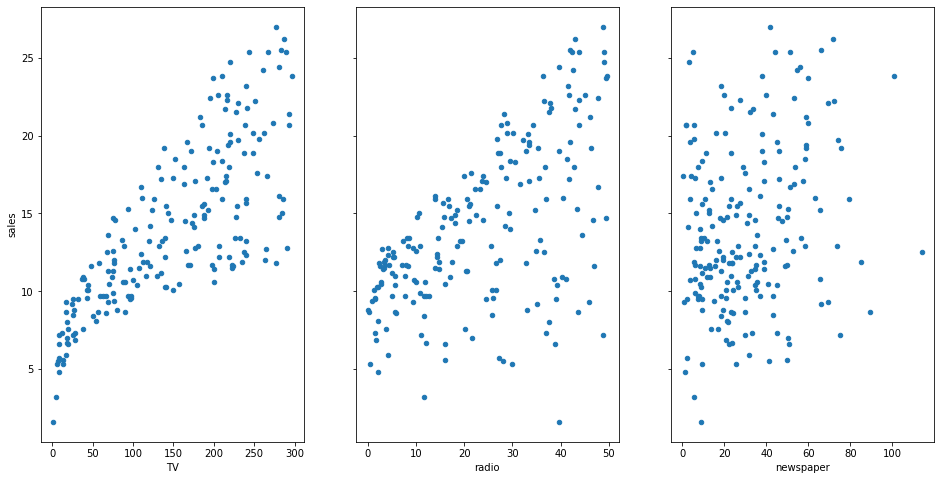

In [11]:
#visualize the relation between features and response using scatter plot
fig,axs=plt.subplots(1,3, sharey=True)
df.plot(kind='scatter', x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# Least Squares Line

In [13]:
#X=df[['TV','radio','newspaper']]
#y=df['sales']

In [14]:
X=df.drop('sales',axis=1)
y=df['sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Modelling

In [16]:
#follow the usual sklearn pattern: import instantiate, fit
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
model.intercept_,model.coef_

(2.7089490925159065, array([0.04405928, 0.1992875 , 0.00688245]))

# Predictions 

In [18]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

# Evaluation

In [19]:
train_res=y_train-train_prediction
test_res=y_test-test_prediction

In [20]:
model.score(X_train,y_train)

0.9055159502227753

In [21]:
model.score(X_test,y_test)

0.8609466508230368

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,test_prediction)

0.8609466508230368

In [23]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
scores

#Average of MSE scores(we set back to positive)
abs(scores.mean())

0.8871063495438435

In [24]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,test_prediction)
MAE

1.5116692224549086

In [25]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,test_prediction)
MSE

3.796797236715219

In [26]:
RMSE=np.sqrt(MSE)
RMSE

1.9485372043446385

# Diagnosis Test

# 1. Linearity(observed values vs fitted values)

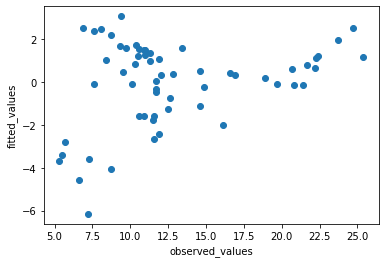

In [27]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

# 2. Normality of Residuals

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

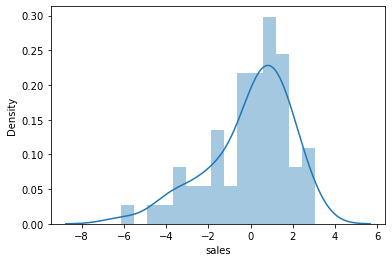

In [28]:
sns.distplot(test_res,bins=15,kde=True)

# 3. Homoscadesicity(y_hat vs residuals)

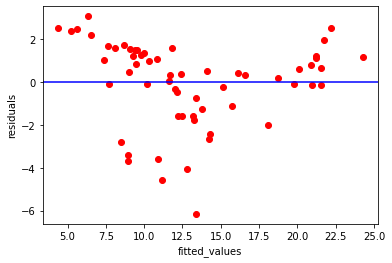

In [29]:
#Homoscadesicity(Residuals vs Fitted values)
plt.scatter(test_prediction,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

# Variables Significance

In [30]:
import statsmodels.formula.api as smf
model1=smf.ols("y~X", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           1.58e-96
Time:                        22:38:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
X[0]           0.0458      0.001     32.809      0.000       0.043       0.049
X[1]           0.1885      0.009     21.893      0.000       0.172       0.206
X[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#check whether data has any influential values

# Influence Index plots

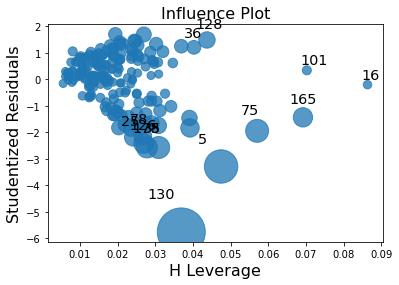

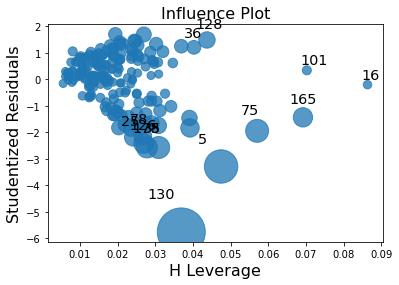

In [32]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [33]:
df_new=df.drop(df.index[[130]],axis=0)
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [34]:
lm=smf.ols(formula='sales~+TV+radio+newspaper',data=df_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     653.7
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          1.88e-101
Time:                        22:38:40   Log-Likelihood:                -369.13
No. Observations:                 199   AIC:                             746.3
Df Residuals:                     195   BIC:                             759.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0931      0.290     10.654      0.000       2.520       3.666
TV             0.0448      0.001     34.425      0.000       0.042       0.047
radio          0.1939      0.008     24.130      0.000       0.178       0.210
newspaper     -0.0043      0.005     -0.777      0.438      -0.015       0.007
==============================================================================
Omnibus:                       21.217   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.630
Skew:                          -0.835   Prob(JB):                     4.48e-06
Kurtosis:                       3.423   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF

In [35]:
#calculating VIF value of model
1/(1-0.897)

9.708737864077671

In [36]:
#calculating VIF's values of independent variables
rsq_TV=smf.ols('TV~radio+newspaper',data=df).fit().rsquared
vif_TV=1/(1-rsq_TV)
rsq_radio=smf.ols('radio~TV+newspaper',data=df).fit().rsquared
vif_radio=1/(1-rsq_radio)
rsq_newspaper=smf.ols('newspaper~radio+TV',data=df).fit().rsquared
vif_newspaper=1/(1-rsq_newspaper)

In [38]:
#storing VIF values in a dataframe
d1={'Variables':['TV','radio','newspaper'],'VIF':[vif_TV,vif_radio,vif_newspaper]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


# Added Variable Plot(AV plot)

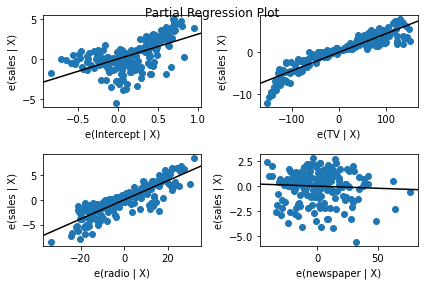

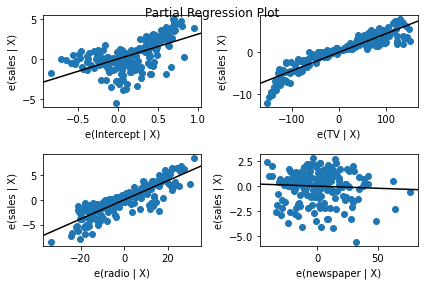

In [39]:
sm.graphics.plot_partregress_grid(lm)

In [40]:
#only include TV and radio in the model
lm=smf.ols(formula='sales~TV+radio',data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           4.83e-98
Time:                        22:52:26   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Retraining Model on Full Data

In [41]:
final_model=smf.ols(formula='sales~TV+radio',data=df).fit()

In [42]:
final_model.params

Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64